#1. Importación de librerías

In [ ]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Perfilamiento y Entendimiento de los datos


In [ ]:
#Carga de datos
df_original=pd.read_csv('/content/drive/MyDrive/BI/Lab 3/Data/202220_Laboratorio_3_data_university_admission_train.csv', sep=',', encoding = 'utf-8', index_col=0)
df_admision = df_original.copy()

In [ ]:
#Muestra de los datos
df_admision.head(50)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,432,320,94,2,1.38,3.50,8.78,1,73.00
5,112,321,84,4,4.13,4.00,8.68,1,69.00
6,55,306,110,3,3.00,3.50,8.00,0,70.00
7,59,299,112,1,0.97,2.00,6.82,1,40.03
8,123,311,74,4,1.50,0.53,8.36,0,57.00
9,477,298,98,2,2.23,3.73,7.43,0,49.08


In [ ]:
#Información de tipos y datos utilizables
df_admision.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         1569 non-null   int64  
 1   GRE Score          1569 non-null   int64  
 2   TOEFL Score        1569 non-null   int64  
 3   University Rating  1569 non-null   int64  
 4   SOP                1569 non-null   float64
 5   LOR                1569 non-null   float64
 6   CGPA               1569 non-null   float64
 7   Research           1569 non-null   int64  
 8   Admission Points   1504 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 122.6 KB


In [ ]:
#Eliminamos todos los nulos, entre ellos, aquellos datos que tengan la variable objetiva nula
df_admision = df_admision.dropna()
df_admision.shape

(1504, 9)

In [ ]:
#Eliminamos la columna "Serial No." pues no tiene valor para el modelo próximo
df_admision = df_admision.drop(["Serial No."], axis = 1)

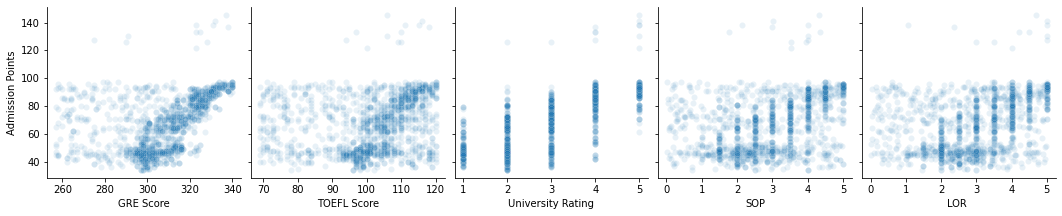

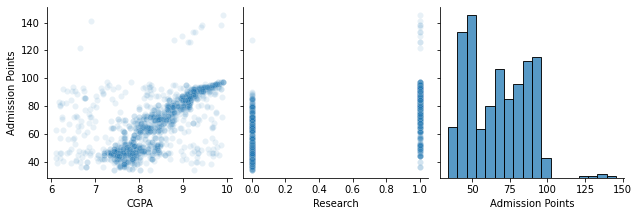

In [ ]:
#Busqueda de las variables que tienen relación con la columna de "Admission Points"
sns.pairplot(df_admision, height=3, y_vars = 'Admission Points', x_vars = df_admision.columns[0:5], kind='scatter', plot_kws = {'alpha':0.1})
sns.pairplot(df_admision, height=3, y_vars = 'Admission Points', x_vars = df_admision.columns[5:8], kind='scatter', plot_kws = {'alpha':0.1})

Podemos obvservar que las variables que parecen seguir un mejor patron para determinar el valor de "Admission Points" son:

- GRE Score
- University Rating
- CGPA

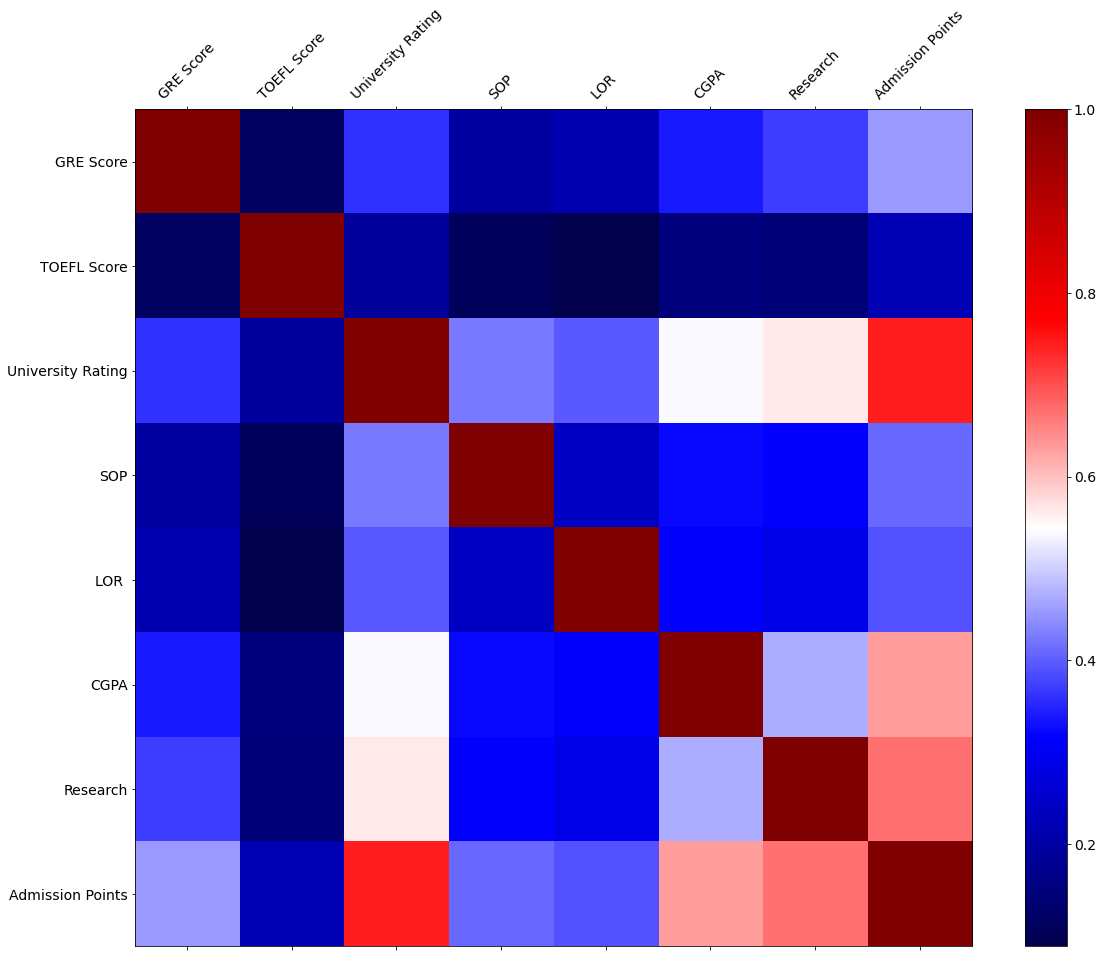

In [ ]:
#Buscamos las relaciones existentes entre las variables y nuestra variable objetivo "Admission Points" mediante una matriz
f = plt.figure(figsize=(19, 15))
plt.matshow(df_admision.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_admision.shape[1]), df_admision.columns, fontsize=14, rotation=45)
plt.yticks(range(df_admision.shape[1]), df_admision.columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Con este método se ve que lo anterior coincide, pero también nos indica que es también es bastante importante el parámetro "Research", sin embargo, al esta ser una variable binaria, lo más probable es que siempre se vea una relación lineal mediante este método. La utilizaremos para el modelo.


# 3. Preprocesamiento de Los Datos

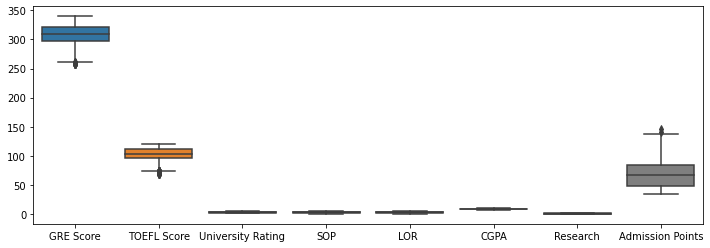

In [ ]:
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_admision)

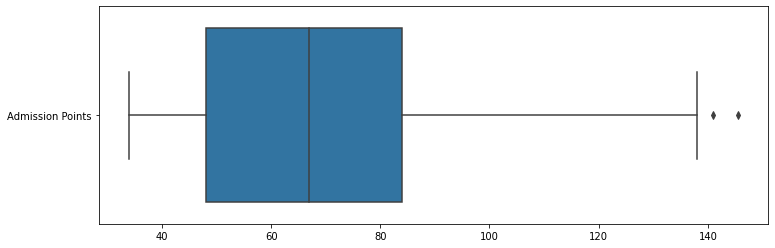

In [ ]:
#Vemos como están los valores atípicos de la variable objetivo
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_admision[['Admission Points']], orient="h")

In [ ]:
#Se eliminan los datos atípicos de la variable objetivo
df_admision = df_admision[df_admision['Admission Points'] <= df_admision['Admission Points'].median() + 2*df_admision['Admission Points'].std()]

#4. Construcción del Modelo y el Pipeline

En este apartado vamos a establecer los parámetros que va a tener nuestro Pipeline a crear. Es entonces que seleccionamos:
- inicial: Utilizaremos ColumnTransformer que se encargará de seleccionar las columnas que seleccionamos anteriormente del dataframe.
- imputer: Usaremos SimpleImputer para que reemplace aquellos valores nulos con la media general que tiene el dataframe.
- scaler: Usaremos MinMaxScaler() para que escale todos los datos entre su mínimo y máximo general
- polinomial_fearure: Para habilitar PolynomialFeatures con un valor de 2

**Aclaración** 

Se conservaron elementos del Laboratorio 3 para mostrar el proceso de selección de las columnas y el proceso del entendimiento de los datos (aunque esto no fuera el enfoque del laboratorio).

También se conservan elementos que no aportan al Pipeline como la interpretación de resultados, pero decidimos mantenerlos en este notebook para conservar la coherencia del mismo.

In [ ]:
#Columnas a Utilizar
selected_cols = [ 'CGPA', 'University Rating', 'Research', 'GRE Score']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])), # Selecciona
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler()), # Escala
       ('polinomial_fearure',PolynomialFeatures(2))
       ]

df_admision.select_dtypes(include = ['float', 'int']).columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admission Points'],
      dtype='object')

In [ ]:
# Se crea el modelo de regresión a utilizar

model = [('model', LinearRegression())]

En este punto se declara el pipeline con los parámetros definidos anteriormente así como con el nuevo modelo.

In [ ]:
#Declaramos el pipeline

pipeline = Pipeline(pre+model)

Se añaden al pipeline las variables explicativas y objetivo para entrenar el modelo.

In [ ]:
#Extraemos las variables explicativas y objetivo para entrenar
X = df_admision.drop('Admission Points', axis = 1)
y = df_admision['Admission Points']

pipeline = pipeline.fit(X,y)

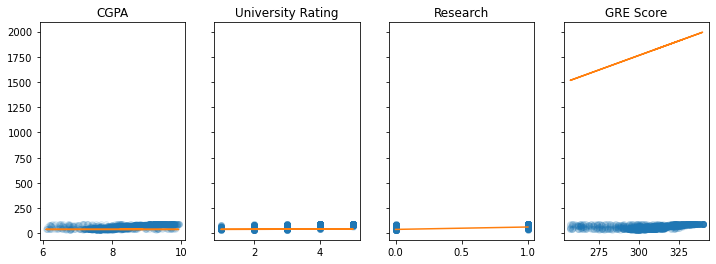

In [ ]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, 4, sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [ ]:
pipeline.score(X,y)

0.7680828057544953

In [ ]:
y_true = y
y_predicted = pipeline.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

8.844770031986785

# 5. Supuestos y profundización



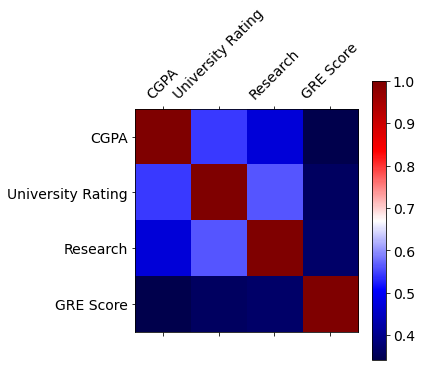

In [ ]:
#Observamos la colinealidad de las variables
df_temp = df_admision[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

In [ ]:
X = df_admision.drop('Admission Points', axis = 1)
y = df_admision['Admission Points']
    
# Declarar aca las columnas con las que se quiere experimentar
for col in selected_cols:

    pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
           ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
           ('scaler', MinMaxScaler())]

    model = [('model', LinearRegression())]

    p_temp = Pipeline(pre+model)
    
    p_temp = p_temp.fit(X,y)
    
    print(f"{col}: {p_temp.score(X,y)}")
  
#La mejor combinación es University Rating y Research

CGPA: 0.4202143884874684
University Rating: 0.5734362415547289
Research: 0.4643264708543353
GRE Score: 0.2118336076553835


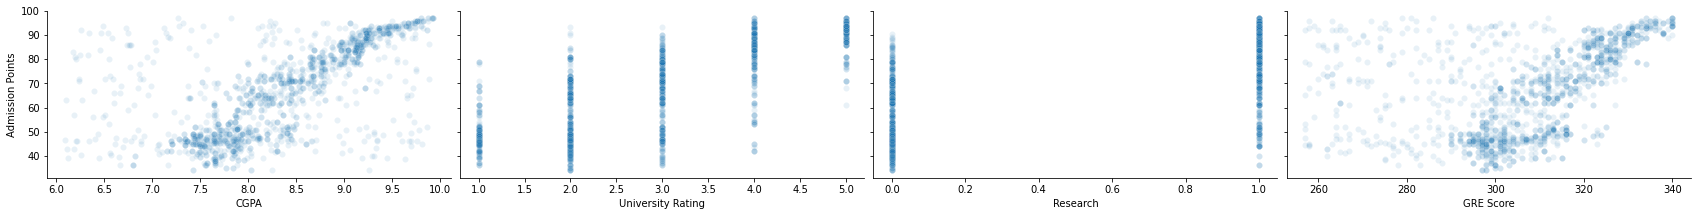

In [ ]:
#Distribución de nuestras variables respecto a la objetivo
sns.pairplot(df_admision, height=3, aspect = 2, y_vars = 'Admission Points', x_vars = selected_cols, kind='scatter', plot_kws = {'alpha':0.1})

In [ ]:
#Revisar Linealidad
for column in selected_cols:
  # Revisamos

  # Creamos la variable
  X = df_admision[[column]].copy()
  X[column+'_2'] = X[column]**2

  # columna
  col = column+'_2'

  pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', MinMaxScaler())]

  model = [('model', LinearRegression())]

  p_temp = Pipeline(pre+model)

  p_temp = p_temp.fit(X,y)

  print(f"{col}: {p_temp.score(X,y)}")


CGPA_2: 0.4404973340698385
University Rating_2: 0.5701304981116321
Research_2: 0.4643264708543353
GRE Score_2: 0.2308276802624709


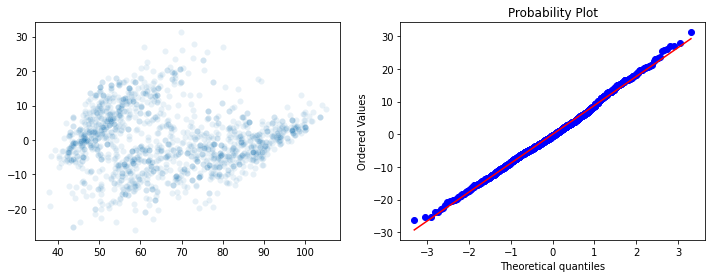

In [ ]:
X = df_admision.drop('Admission Points', axis = 1)
y = df_admision['Admission Points']

# Calculamos los errores
errors = (pipeline.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

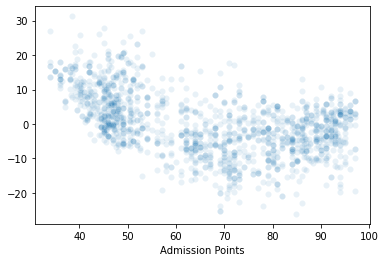

In [ ]:
# Visualizamos nuestros datos
sns.scatterplot(data  = df_admision, x = 'Admission Points', y = errors, alpha = 0.1)

In [ ]:
#Nuevamente visualizamos los resultados
y_true = y
y_predicted = pipeline.predict(X)
np.sqrt(mse(y_true,y_predicted))

8.844770031986785

#Correlación

In [ ]:
df_clean = df_admision.copy()
df_clean = df_clean[df_clean['Admission Points'] <= df_clean['Admission Points'].median() + 2*df_clean['Admission Points'].std()]

X = df_clean.drop('Admission Points', axis=1 )
y = df_clean['Admission Points']

cols = ['CGPA', 'University Rating', 'Research', 'GRE Score']

modelo =      [('initial',ColumnTransformer([("selector", 'passthrough',cols)])),
                      ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', MinMaxScaler()),
                      ('polinomial_feature', PolynomialFeatures(1)),
                      ('model', LinearRegression())]

p2 = Pipeline(modelo)
p2 = p2.fit(X,y)
coef = np.delete(p2['model'].coef_, 0)
coef

array([21.14306371, 25.03383956, 10.52941757, 10.25913593])

In [ ]:
# Resultado de los coeficientes
pd.DataFrame({'Columnas':cols, 'Coeficientes':coef})

,Columnas,Coeficientes
0,CGPA,21.143064
1,University Rating,25.033840
2,Research,10.529418
3,GRE Score,10.259136


# 6. Exportar el modelo

Se exporta el pipeline como un Joblib para que pueda ser interpretado por nuestra API.

In [ ]:
#Usamos la libreria joblib
filename = 'modelo.joblib'

dump(pipeline, filename)

['modelo.joblib']